In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns; 
from sklearn.ensemble import ExtraTreesRegressor as ETC
from sklearn import metrics
sns.set(style="ticks", color_codes=True)
%matplotlib inline
import time
import itertools

In [2]:
# Normalize the data frame values such that the std of each column will be approximately 1
def norm_fun(df):
    for k in df.columns.values:
        col_mean=df[k].mean()
        col_len=len(df)
        Denom=np.sqrt(1/col_len*np.sum((df[k]-col_mean)**2))
        df[k] = df[k].apply(lambda x: x/Denom)
    return df

In [3]:
d_test=pd.read_pickle('d_test.pkl')
d_test.reset_index(inplace=True,drop=True)

d_train=pd.read_pickle('d_train.pkl')
d_train.reset_index(inplace=True,drop=True)

d_train['y_train10']=np.log10(d_train.y_train)

X=d_train.iloc[:,0:6]
X_train=norm_fun(X)
y_train=d_train['y_train']
d_train.iloc[:,0:6]=X_train

X_test=d_test.iloc[:,0:6]
X_test=norm_fun(X_test)
y_test=d_test['y_test']

In [4]:
forest = ETC(n_estimators=250, random_state=2)

def apply_etc(X_train,y_train,X_test,y_test):
    
    forest.fit(X_train, y_train)
    y_predicted=forest.predict(X_test)
#     print("r2=",metrics.r2_score(y_test, y_predicted))
#     print("MAE=",metrics.mean_absolute_error(y_test.values,y_predicted))
#     print("RSS=",np.sum((y_test.values-y_predicted)**2))
    return metrics.r2_score(y_test, y_predicted),metrics.mean_absolute_error(y_test.values,y_predicted),np.sum((y_test.values-y_predicted)**2)

In [5]:
start_time = time.time()
R2,MAE,RSS=apply_etc(X_train,y_train,X_test,y_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 447.1361985206604 seconds ---


In [10]:
start_time = time.time()
R2_buf=[]
MAE_buf=[]
RSS_buf=[]
for k in np.arange(1,7):
    buf=np.asarray(list(itertools.combinations(np.arange(0,6), k)))
    for item in buf:
        X_tr_comb=X_train.iloc[:,item]
        X_ts_comb=X_test.iloc[:,item]
        R2,MAE,RSS=apply_etc(X_tr_comb,y_train,X_ts_comb,y_test)
        R2_buf.append(R2)
        MAE_buf.append(MAE)
        RSS_buf.append(RSS)
print("--- %s seconds ---" % (time.time() - start_time))       

--- 11271.360762357712 seconds ---


In [20]:
ls=[]
for k in np.arange(1,7):
    ls.extend(list(itertools.combinations(np.arange(0,6), k)))
idx=MAE_buf.index(min(MAE_buf))
ls[idx]
X_train.columns.values[list(ls[idx])]

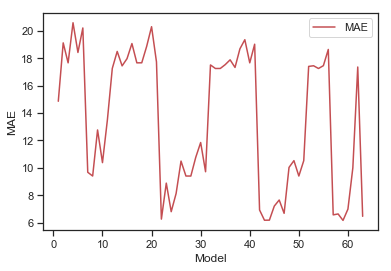

In [12]:
plt.plot(np.arange(1,len(ls)+1), MAE_buf, 'r-',
         label='MAE')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.legend()
plt.show()

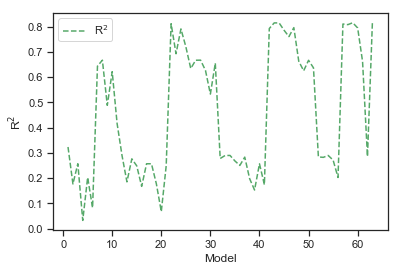

In [13]:
plt.plot(np.arange(1,len(ls)+1), R2_buf, 'g--',
         label='R$^2$')

plt.xlabel('Model')
plt.ylabel('R$^2$')
plt.legend()
plt.show()

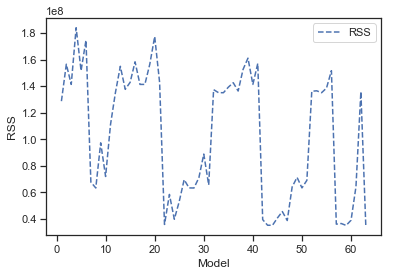

In [14]:

plt.plot(np.arange(1,len(ls)+1), RSS_buf, 'b--',
         label='RSS')


plt.xlabel('Model')
plt.ylabel('RSS')
plt.legend()
plt.show()

In [17]:
np.min(MAE_buf)

6.1632674804252625

[14.858687171384952,
 19.12110041152027,
 17.663211114902484,
 20.59028960807279,
 18.42092994880732,
 20.20925921444866,
 9.677953158910583,
 9.402787469865434,
 12.765732032805797,
 10.380559649492408,
 13.49496585970871,
 17.25599150800287,
 18.496424426651657,
 17.443169264512683,
 17.96935185633092,
 19.07150581564039,
 17.663704115673657,
 17.66669731382516,
 18.86252397424792,
 20.301859477848172,
 17.73209627820235,
 6.2584523223990045,
 8.885105576340884,
 6.800644204045271,
 8.129298430632373,
 10.493253887975232,
 9.402843254960231,
 9.401954164506515,
 10.767488798124505,
 11.848070278860964,
 9.715885919125856,
 17.51114025689927,
 17.25152461649236,
 17.25385905911854,
 17.532082483365905,
 17.88343894919178,
 17.32768679800383,
 18.68825467358861,
 19.352305463388852,
 17.664305967158928,
 19.023589891963354,
 6.923474852365904,
 6.176590662780627,
 6.182843548115462,
 7.210082947243106,
 7.653538163941937,
 6.68037742397507,
 10.0316815049891,
 10.524607665258586,
 9.40

In [19]:
MAE_Extra_T=pd.DataFrame(MAE_buf,columns=['Extra_T'])
MAE_Extra_T.to_csv('Extra_T.csv')